<a href="https://colab.research.google.com/github/rfadeyansa/Capstone-Project/blob/main/Model_Statistika_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install library yang dibutuhkan (jika belum terinstal)
!pip install pandas statsmodels

In [ ]:
# Import library yang diperlukan
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Mengimport File dari Google Colab
# Mengupload File CSV
from google.colab import drive, files
uploaded = files.upload()

Saving Data-Sheet1.csv to Data-Sheet1.csv


In [ ]:
# Proses upload dataset
for filename in uploaded.keys():
    print(f'File "{filename}" berhasil diupload!')
    # Baca dataset
    df = pd.read_csv(filename)
    # Lakukan analisis statistika seperti pada contoh sebelumnya

File "Data-Sheet1.csv" berhasil diupload!


In [ ]:
# Contoh dataset (ganti dengan dataset yang sesuai)
data = {'X': [1, 2, 3, 4, 5],
        'Y': [2, 4, 5, 4, 5]}

# Membuat DataFrame dari dataset
df = pd.DataFrame(data)

# Menambahkan kolom bias untuk regresi linear
df['bias'] = 1

# Membuat model regresi linear
model = sm.OLS(df['Y'], df[['bias', 'X']])

In [ ]:
# Melatih model
results = model.fit()

# Menampilkan hasil analisis statistika
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     4.500
Date:                Tue, 05 Dec 2023   Prob (F-statistic):              0.124
Time:                        16:26:03   Log-Likelihood:                -5.2598
No. Observations:                   5   AIC:                             14.52
Df Residuals:                       3   BIC:                             13.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bias           2.2000      0.938      2.345      0.1

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


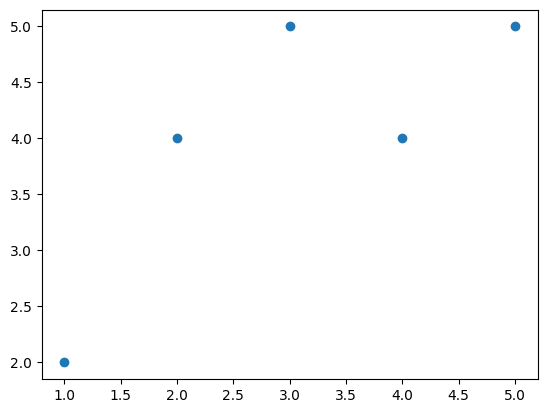

In [ ]:
# Visualisasi scatter plot
plt.scatter(df['X'], df['Y'], label='Data Asli')

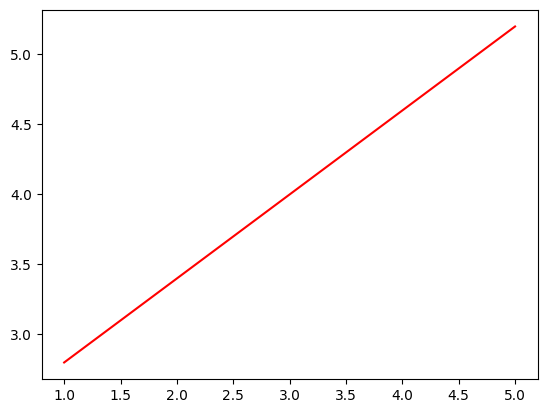

In [ ]:
# Visualisasi garis regresi
plt.plot(df['X'], results.predict(), label='Regresi Linear', color='red')

Text(0.5, 1.0, 'Regresi Linear di Google Colab')

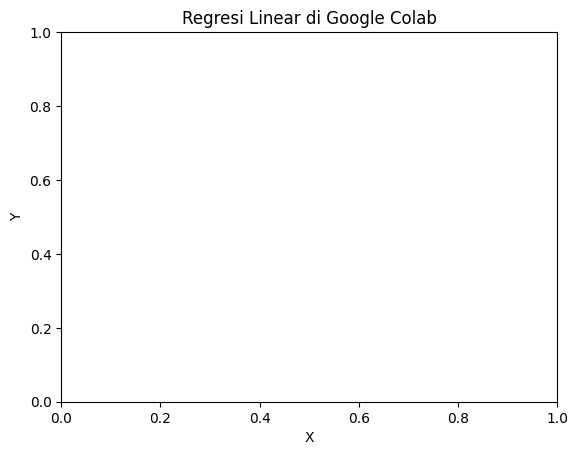

In [ ]:
# Menambahkan label dan judul
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Regresi Linear di Google Colab')

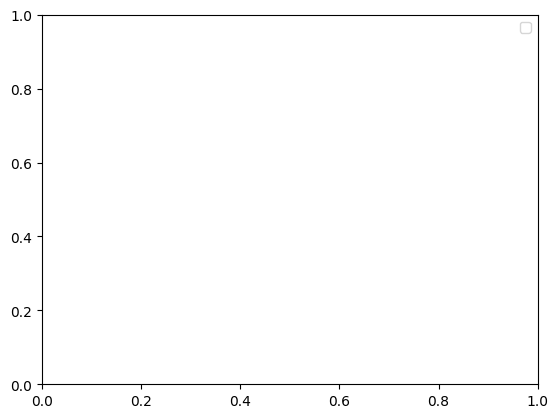

In [ ]:
# Menampilkan legenda
plt.legend()

In [ ]:
# Menampilkan plot
plt.show()

In [ ]:
# Contoh prediksi untuk nilai X baru
new_X = 6
predicted_Y = results.predict([1, new_X])

print(f'Prediksi Y untuk X={new_X}: {predicted_Y[0]}')

Prediksi Y untuk X=6: 5.799999999999999


In [ ]:
# Statistik deskriptif
print(df.describe())

              X         Y  bias
count  5.000000  5.000000   5.0
mean   3.000000  4.000000   1.0
std    1.581139  1.224745   0.0
min    1.000000  2.000000   1.0
25%    2.000000  4.000000   1.0
50%    3.000000  4.000000   1.0
75%    4.000000  5.000000   1.0
max    5.000000  5.000000   1.0


In [ ]:
# Melakukan prediksi terhadap data latih
df['Y_pred'] = results.predict()

In [ ]:
# Menghitung Mean Squared Error dan Mean Absolute Error
mse = mean_squared_error(df['Y'], df['Y_pred'])
mae = mean_absolute_error(df['Y'], df['Y_pred'])

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 0.48000000000000015
Mean Absolute Error: 0.6399999999999999


In [ ]:
# Contoh data baru untuk prediksi
new_data = {'X': [6, 7, 8],
            'bias': [1, 1, 1]}

# Membuat DataFrame dari data baru
new_df = pd.DataFrame(new_data)

# Melakukan prediksi terhadap data baru
new_df['Y_pred'] = results.predict(new_df[['bias', 'X']])

In [ ]:
# Menampilkan hasil prediksi
print(new_df[['X', 'Y_pred']])

   X  Y_pred
0  6     5.8
1  7     6.4
2  8     7.0


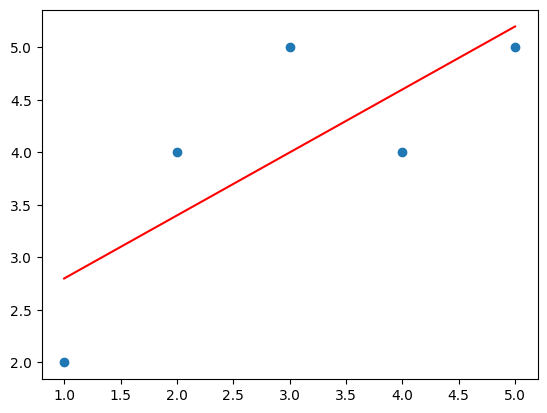

In [ ]:
# Visualisasi prediksi terhadap data latih
plt.scatter(df['X'], df['Y'], label='Data Asli')
plt.plot(df['X'], df['Y_pred'], label='Prediksi pada Data Latih', color='red')

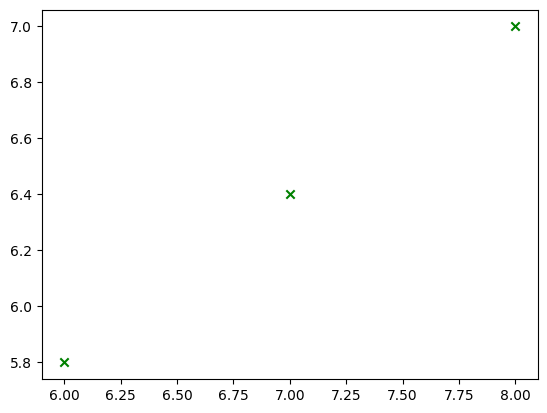

In [ ]:
# Visualisasi prediksi terhadap data baru
plt.scatter(new_df['X'], new_df['Y_pred'], label='Prediksi pada Data Baru', marker='x', color='green')

Text(0.5, 1.0, 'Prediksi Regresi Linear di Google Colab')

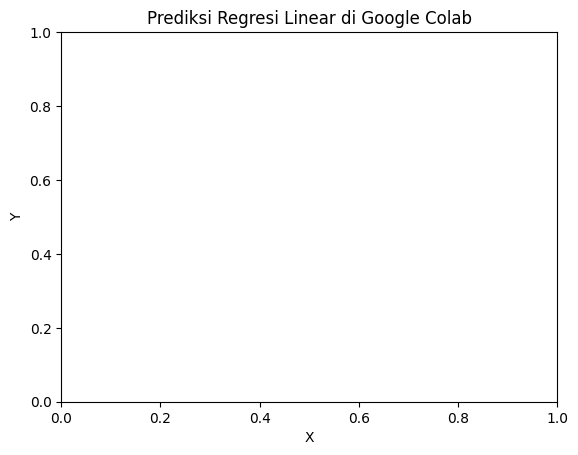

In [ ]:
# Menambahkan label dan judul
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Prediksi Regresi Linear di Google Colab')

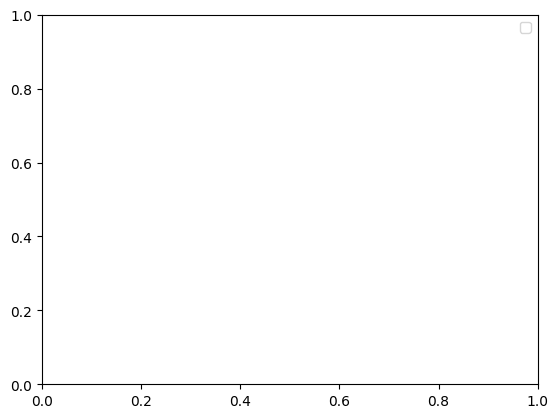

In [ ]:
# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

In [ ]:
# Membersihkan plot sebelumnya
plt.close()

In [ ]:
# Menghapus kolom 'Y_pred' dari DataFrame agar tidak mempengaruhi visualisasi berikutnya
df.drop(columns=['Y_pred'], inplace=True)

# Menampilkan DataFrame hasil analisis
print("DataFrame Hasil Analisis:")
print(df)

DataFrame Hasil Analisis:
   X  Y  bias
0  1  2     1
1  2  4     1
2  3  5     1
3  4  4     1
4  5  5     1


In [ ]:
# Menyimpan model ke dalam file untuk penggunaan selanjutnya (Opsional)
results.save('regression_model.pkl')
print("Model Regresi Linear berhasil disimpan.")

Model Regresi Linear berhasil disimpan.


In [ ]:
# Mengupload model (Opsional)
from google.colab import files
files.download('regression_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>